# K-Means Clustering

In [4]:
from sklearn.datasets import make_blobs
import pandas as pd

In [5]:
dataset, clases = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, random_state=0)
df = pd.DataFrame(dataset, columns=["var1", "var2"])
df.head()

,var1,var2
0,2.204387,1.560857
1,-1.133740,2.684673
2,1.064983,4.102897
3,-2.376038,7.324207
4,1.682890,0.484444


In [7]:
#pip install yellowbrick

In [8]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

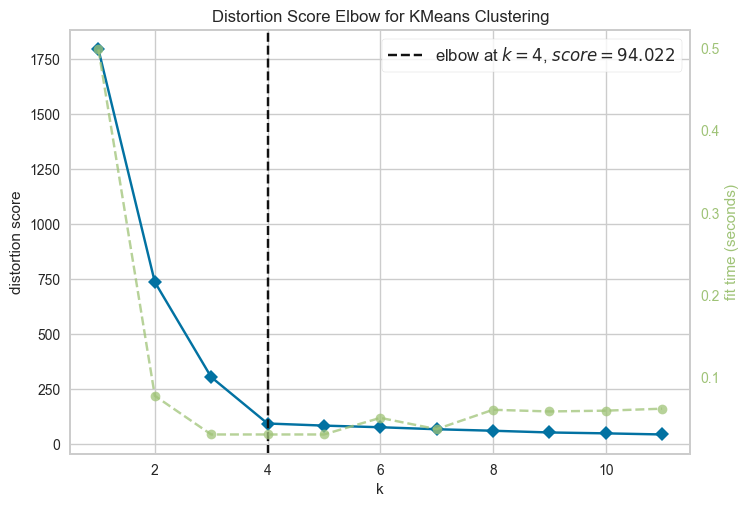

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12)).fit(df)
visualizer.show()

In [10]:
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=0).fit(df)

In [11]:
# Obtenemos los valores de la predicción (kmeans.predict(df)):
kmeans.labels_

array([1, 0, 3, 2, 1, 3, 0, 3, 3, 3, 3, 1, 0, 0, 1, 3, 2, 2, 2, 1, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 3, 2, 3, 0, 1, 0, 3, 0, 3, 3, 2, 2, 2, 2, 3,
       1, 0, 3, 2, 2, 3, 2, 0, 0, 2, 3, 2, 0, 1, 3, 1, 2, 3, 1, 3, 2, 3,
       1, 2, 0, 0, 1, 1, 3, 3, 0, 2, 0, 0, 1, 1, 2, 3, 1, 0, 0, 3, 3, 1,
       0, 0, 2, 2, 2, 3, 3, 1, 0, 2, 3, 3, 2, 1, 1, 2, 2, 0, 3, 1, 1, 3,
       2, 0, 0, 1, 1, 3, 0, 0, 2, 3, 2, 0, 3, 1, 3, 0, 3, 0, 1, 3, 0, 1,
       0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 3, 1, 0, 2, 2, 2, 3, 0,
       1, 3, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 3, 1, 1, 0, 1, 3, 0, 2, 2, 2,
       3, 3, 0, 3, 0, 1, 3, 1, 3, 0, 0, 2, 3, 2, 1, 1, 3, 2, 0, 0, 0, 3,
       2, 1])

In [12]:
kmeans.inertia_


94.02242630751752

In [13]:
kmeans.n_iter_

2

In [14]:
kmeans.cluster_centers_

array([[-1.60782913,  2.9162828 ],
       [ 2.06911036,  0.96146833],
       [-1.33173192,  7.7400479 ],
       [ 0.91932803,  4.34824615]])

In [15]:
from collections import Counter
Counter(kmeans.labels_)


Counter({1: 50, 0: 50, 3: 50, 2: 50})

In [16]:
#pip install seaborn

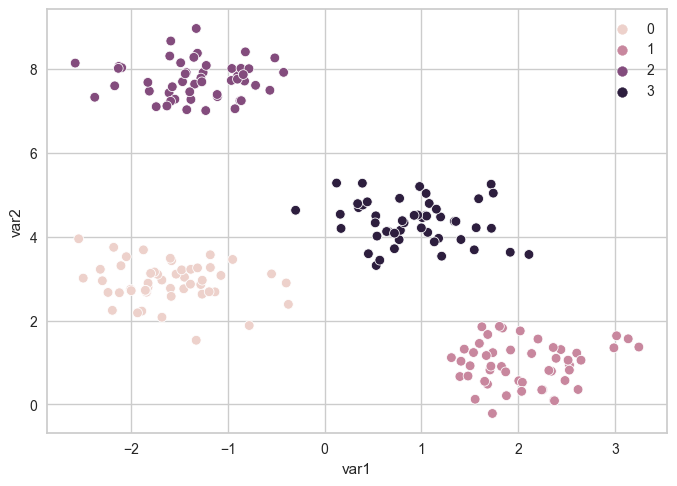

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="var1", y="var2", hue=kmeans.labels_)
plt.show()

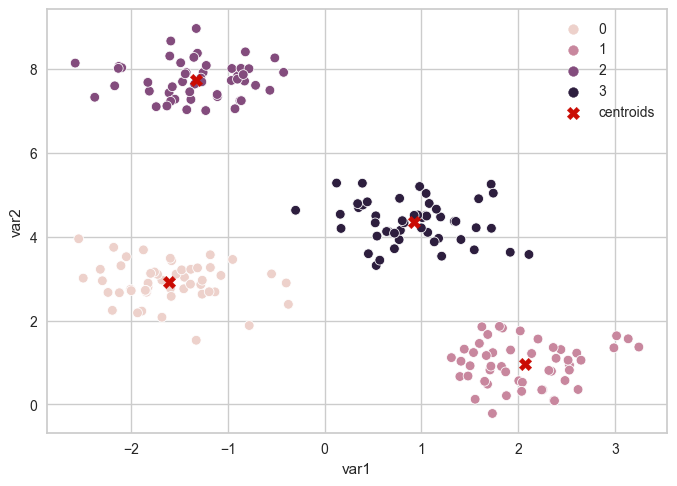

In [18]:
sns.scatterplot(data=df, x="var1", y="var2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
 marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()